# Problem Statement
You are the sales manager for "BeerMart", an online beer store in the United States. You want to build a recommendation system (collaborative) for your store, where customers will be recommended the beer that they are most likely to buy.

## Data Understanding

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing data
df = pd.read_csv('beer_data.csv')
df.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


In [3]:
# shape of the data frame
df.shape

(475984, 3)

## Data preparation

### Missing values present in the data set

In [4]:
# null values present in the data set
df.isnull().sum()

beer_beerid             0
review_profilename    100
review_overall          0
dtype: int64

#### There are around 100 missing values in the review_profilename column

### Remove the missing values

In [5]:
# dropping the missing rows
df = df.dropna()
df.isnull().sum()

beer_beerid           0
review_profilename    0
review_overall        0
dtype: int64

In [6]:
# data frame after removing the missing rows
df.shape

(475884, 3)

### Checking duplicate rows

In [7]:
# duplicate rows
duplicate_rows = df[df[['beer_beerid', 'review_profilename']].duplicated() == True]
duplicate_rows.head()

,beer_beerid,review_profilename,review_overall
1248,52211,AleWatcher,3.5
2301,73647,barleywinefiend,4.5
2349,14243,northyorksammy,2.5
2608,1122,Slatetank,4.0
2874,1121,kenito799,4.5


In [8]:
# shape of duplicate rows
duplicate_rows.shape

(1422, 3)

#### 1422 rows have duplicate values

### Removing duplicate rows

In [9]:
# removing duplicate rows
df = df.drop_duplicates(subset=['beer_beerid','review_profilename'], keep = 'first')
df.shape

(474462, 3)

## Data Exploration

### Counting and plotting the number of ratings given to each beer

In [10]:
# number of rating given to each beer
df['beer_beerid'].value_counts()

2093     977
412      966
1904     902
1093     840
92       812
4083     798
276      788
7971     778
88       755
1013     750
34       743
17112    741
11757    721
2671     712
695      704
6108     703
1005     703
680      702
754      690
1160     685
104      684
1708     681
645      678
355      674
131      655
73       651
571      616
30420    612
2512     603
731      588
        ... 
37242      1
45438      1
47487      1
66120      1
76365      1
17122      1
27237      1
23265      1
72011      1
39035      1
44914      1
63607      1
38773      1
65400      1
61306      1
59259      1
57212      1
55165      1
13036      1
73804      1
746        1
22627      1
30823      1
25318      1
6251       1
31461      1
53362      1
57460      1
42666      1
69794      1
Name: beer_beerid, Length: 40304, dtype: int64

In [11]:
# removing the beer if the count is less than 30
df1 = df[df.groupby('beer_beerid')['beer_beerid'].transform('size') > 30]
df1.head()

,beer_beerid,review_profilename,review_overall
12,436,Brent,3.0
18,25414,NJpadreFan,4.0
19,25414,vacax,2.5
20,25414,mikesgroove,4.0
21,25414,hdofu,4.0


In [12]:
# Higher count of rating given to the beer
print('Higher number rating given to the beer:')
print(df1['beer_beerid'].value_counts().head())

# Lower count of rating given to the beer
print('Lower number of rating given to the beer:')
print(df1['beer_beerid'].value_counts().tail())

Higher number rating given to the beer:
2093    977
412     966
1904    902
1093    840
92      812
Name: beer_beerid, dtype: int64
Lower number of rating given to the beer:
49215    31
7467     31
38101    31
12993    31
37294    31
Name: beer_beerid, dtype: int64


In [13]:
# shape of the final cleaned dataframe
df1.shape

(334582, 3)

#### Successfully removed the beers having very less count of rating by the customer

###  Unique values of ratings

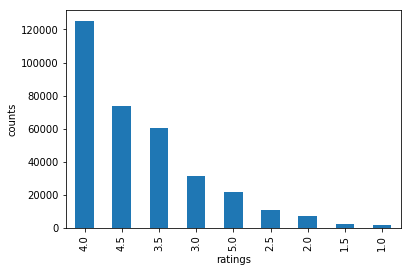

In [14]:
# rating and their counts in the data frame
pd.value_counts(df1['review_overall']).plot.bar()
plt.xlabel('ratings')
plt.ylabel('counts')
plt.show()

##### inference:
- most of the beers are given 4.0 rating

### Average beer ratings

In [15]:
# Average rating given to every beer
avg_beer_rating = pd.DataFrame(df1.groupby('beer_beerid')['review_overall'].mean())
avg_beer_rating = avg_beer_rating.reset_index()
avg_beer_rating['review_overall'] = round(avg_beer_rating['review_overall'],2)
avg_beer_rating.head()

,beer_beerid,review_overall
0,5,3.55
1,6,3.71
2,7,3.32
3,9,3.38
4,10,3.88


In [16]:
# Number of unique beers
avg_beer_rating.shape

(3057, 2)

##### There are 3059 different kind of beers in the data frame

In [17]:
# average rating of the every beer
avg_beer_rating = avg_beer_rating.sort_values('review_overall')
avg_beer_rating.head()

,beer_beerid,review_overall
781,2213,1.43
2185,37389,1.70
1636,20638,1.83
117,233,1.88
2231,38763,1.88


In [18]:
# average rating of the beer
avg_beer_rating.tail()

,beer_beerid,review_overall
1314,7971,4.60
1680,21690,4.61
595,1545,4.62
2359,41928,4.63
1541,16814,4.65


###### inferences:
- beerId 2213 has given lowest average rating
- beerId 16814 has given highest average rating

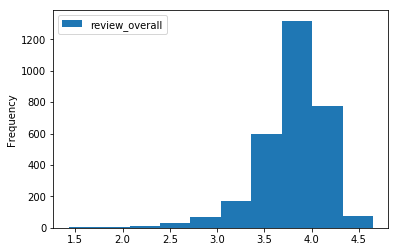

In [19]:
# Ploting the average beer rating
avg_beer_rating.plot(x='beer_beerid', y='review_overall', kind = 'hist')
plt.show()

#### Mostly the average rating is between 3.5 to 4.0

### Average user ratings

In [20]:
# Average rating given by each user
avg_user_rating = pd.DataFrame(df1.groupby('review_profilename')['review_overall'].mean())
avg_user_rating = avg_user_rating.reset_index()
avg_user_rating['review_overall'] = round(avg_user_rating['review_overall'],2)
avg_user_rating.head()

,review_profilename,review_overall
0,0110x011,4.33
1,01Ryan10,5.00
2,04101Brewer,4.00
3,05Harley,4.14
4,0beerguy0,4.17


In [21]:
# Number of unique users
avg_user_rating.shape

(20182, 2)

##### There are 20182 unique users who has given the rating

In [22]:
# Users who have given least rating
avg_user_rating = avg_user_rating.sort_values('review_overall')
avg_user_rating.head()

,review_profilename,review_overall
16057,myhair,1.0
11500,domjwl,1.0
13212,ifij775,1.0
13217,ifurlong,1.0
11903,elbowone,1.0


In [23]:
# Users who have given highest rating
avg_user_rating.tail()

,review_profilename,review_overall
19121,timhoth,5.0
11140,davisdandrew,5.0
11144,dawgontap,5.0
7253,SurlyZach,5.0
20181,zzajjber,5.0


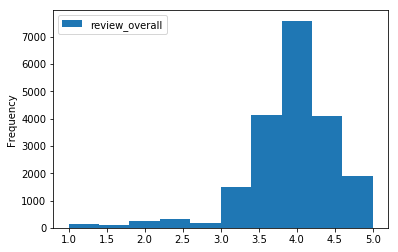

In [24]:
# Ploting the average user rating
avg_user_rating.plot(x='review_profilename', y='review_overall', kind = 'hist')
plt.show()

##### Mostly 4 rating is given to the beer by the user

### Total count of each beer present in the dataset

In [25]:
df1.head()

,beer_beerid,review_profilename,review_overall
12,436,Brent,3.0
18,25414,NJpadreFan,4.0
19,25414,vacax,2.5
20,25414,mikesgroove,4.0
21,25414,hdofu,4.0


In [26]:
# total count of each beer
total_beer_count = pd.DataFrame(df1.groupby('beer_beerid').count().reset_index().drop(['review_overall'],axis = 1))
total_beer_count = total_beer_count.rename(columns = {'review_profilename' : 'total_count_of_beer'})
total_beer_count = total_beer_count.sort_values('total_count_of_beer', ascending = False)
print('Beer having maximum count:')
print(total_beer_count.head(5))
print('Beer having minimum count:')
print(total_beer_count.tail(5))

Beer having maximum count:
     beer_beerid  total_count_of_beer
756         2093                  977
209          412                  966
709         1904                  902
448         1093                  840
43            92                  812
Beer having minimum count:
      beer_beerid  total_count_of_beer
1835        27339                   31
2317        41009                   31
848          2473                   31
786          2222                   31
2875        58605                   31


###### inferences:
- 2093 is the beer_id  having maximum count

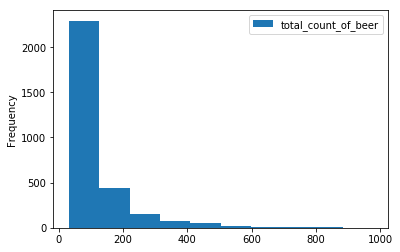

In [27]:
# Ploting the total beer count
total_beer_count.plot(x='beer_beerid', y='total_count_of_beer', kind = 'hist')
plt.show()

### Total count of each user present in the dataset

In [28]:
# total count of ratings given by each user
total_user_count = pd.DataFrame(df1.groupby('review_profilename').count().reset_index().drop(['review_overall'],axis = 1))
total_user_count = total_user_count.rename(columns = {'beer_beerid' : 'total_count'})
total_user_count = total_user_count.sort_values('total_count', ascending = False)
print('User having maximum count:')
print(total_user_count.head(5))
print('User having minimum count:')
print(total_user_count.tail(5))

User having maximum count:
      review_profilename  total_count
1463       BuckeyeNation          687
15593        mikesgroove          673
16337     northyorksammy          603
9853            brentk56          594
8072              WesWes          575
User having minimum count:
      review_profilename  total_count
10110         business32            1
10114           butti001            1
10119         buzzardman            1
10120           buzzgreg            1
20181           zzajjber            1


#### BuckeyeNation is the user having maximum count

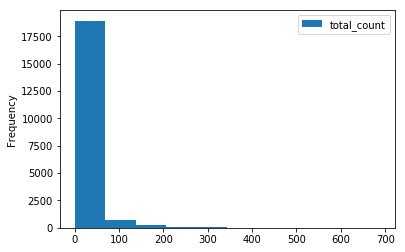

In [29]:
# Ploting the total user count
total_user_count.plot(x='review_profilename', y='total_count', kind = 'hist')
plt.show()

# Recommendation model

### Dividing the dataset into train and test

In [30]:
# dividing the data into train and test
from sklearn.model_selection import train_test_split
train, test = train_test_split(df1, test_size=0.30, random_state=31)

In [31]:
# shape of the train and test data
print(train.shape)
print(test.shape)

(234207, 3)
(100375, 3)


In [32]:
# pivot ratings into beer features
df_beer_features = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(0)

In [33]:
df_beer_features.head()

beer_beerid,5,6,7,9,10,14,15,17,19,23,...,74323,74390,74530,74548,74579,74827,74904,74986,75013,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01Ryan10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04101Brewer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### User based collaborative filtering

#### Copy train and test dataset

These dataset will be used for prediction and evaluation. 
- Dummy train will be used later for prediction of the beers which has not been rated by the user. To ignore the beers rated by the user, we will mark it as 0 during prediction. The beers not rated by user is marked as 1 for prediction. 
- Dummy test will be used for evaluation. To evaluate, we will only make prediction on the beers rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [34]:
# copying to dummy_train and dummy_test
dummy_train = train.copy()
dummy_test = test.copy()

In [35]:
# converting the data to 0 and 1
dummy_train['review_overall'] = dummy_train['review_overall'].apply(lambda x: 0 if x>=1 else 1)
dummy_test['review_overall'] = dummy_test['review_overall'].apply(lambda x: 1 if x>=1 else 0)

In [36]:
# The beers not rated by user is marked as 1 for prediction. 
dummy_train = dummy_train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(1)

# The beers not rated by user is marked as 0 for evaluation. 
dummy_test = dummy_test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(0)

In [37]:
dummy_train.head()

beer_beerid,5,6,7,9,10,14,15,17,19,23,...,74323,74390,74530,74548,74579,74827,74904,74986,75013,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01Ryan10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
04101Brewer,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
05Harley,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0beerguy0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [38]:
dummy_test.head()

beer_beerid,5,6,7,9,10,14,15,17,19,23,...,74323,74390,74530,74548,74579,74827,74904,74986,75013,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0runkp0s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
print(dummy_train.shape)
print(dummy_test.shape)

(17729, 3057)
(12834, 3057)


### User Similarity Matrix

#### Using Cosine Similarity

In [40]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_beer_features, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]]


In [41]:
user_correlation.shape

(17729, 17729)

### Using adjusted Cosine

#### Here, not removing the NaN values and calculating the mean only for the beers rated by the user

In [42]:
beer_features = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [43]:
beer_features.head()

beer_beerid,5,6,7,9,10,14,15,17,19,23,...,74323,74390,74530,74548,74579,74827,74904,74986,75013,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01Ryan10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04101Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0beerguy0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Normalising the rating of the beer for each user around 0 mean

In [44]:
mean = np.nanmean(beer_features, axis=1)
df_subtracted = (beer_features.T-mean).T

In [45]:
df_subtracted.head()

beer_beerid,5,6,7,9,10,14,15,17,19,23,...,74323,74390,74530,74548,74579,74827,74904,74986,75013,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01Ryan10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04101Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0beerguy0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Finding cosine similarity

In [46]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]]


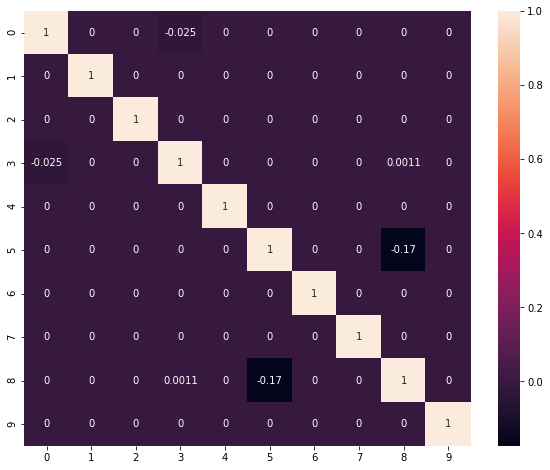

In [50]:
# relation between top 10 users
plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame(user_correlation).iloc[:10,:10], annot = True)
plt.show()

#### The correlation between the users shows:
- user 4 is negatively correlated to user 1 and positively correlated to user 9
- user 9 is negatively correlated to user 6

### Prediction

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0. 

In [51]:
user_correlation[user_correlation<0]=0
user_correlation

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [52]:
print(user_correlation.shape)

(17729, 17729)


Rating predicted by the user (for beers rated as well as not rated) is the weighted sum of correlation with the beer rating (as present in the rating dataset).

In [53]:
user_predicted_ratings = np.dot(user_correlation, beer_features.fillna(0))
user_predicted_ratings

array([[ 1.37153266,  2.50615176,  2.19609821, ...,  3.01990172,
         1.82102835,  1.26312077],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [54]:
user_predicted_ratings.shape

(17729, 3057)

Since we are interested only in the movies not rated by the user, we will ignore the movies rated by the user by making it zero

In [55]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

beer_beerid,5,6,7,9,10,14,15,17,19,23,...,74323,74390,74530,74548,74579,74827,74904,74986,75013,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,1.371533,2.506152,2.196098,0.202465,2.422793,0.402866,1.304350,1.781941,2.195640,0.283041,...,1.173845,1.222390,0.368979,0.636009,1.156714,1.414771,0.484664,3.019902,1.821028,1.263121
01Ryan10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
04101Brewer,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
05Harley,1.349774,1.636160,1.706415,0.135548,1.567003,0.081477,0.235822,1.493895,1.460644,0.190818,...,0.611115,0.167742,0.684908,0.467648,0.523568,0.912065,0.404257,1.365308,0.317300,0.684587
0beerguy0,0.209950,1.420339,1.218591,0.000000,1.010182,0.055384,0.314691,0.366826,0.391068,0.225421,...,0.054173,0.000000,0.000000,0.000000,0.054173,0.000000,0.000000,0.000000,0.000000,0.131953


### Finding the top 5 recommendation for the user 0

In [56]:
user_final_rating.iloc[0].sort_values(ascending=False)[0:5]

beer_beerid
7971     19.772688
19960    16.185350
17112    16.124021
11757    15.024889
680      14.676183
Name: 0110x011, dtype: float64

In [57]:
user_final_rating[:10]

beer_beerid,5,6,7,9,10,14,15,17,19,23,...,74323,74390,74530,74548,74579,74827,74904,74986,75013,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,1.371533,2.506152,2.196098,0.202465,2.422793,0.402866,1.304350,1.781941,2.195640,0.283041,...,1.173845,1.222390,0.368979,0.636009,1.156714,1.414771,0.484664,3.019902,1.821028,1.263121
01Ryan10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
04101Brewer,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
05Harley,1.349774,1.636160,1.706415,0.135548,1.567003,0.081477,0.235822,1.493895,1.460644,0.190818,...,0.611115,0.167742,0.684908,0.467648,0.523568,0.912065,0.404257,1.365308,0.317300,0.684587
0beerguy0,0.209950,1.420339,1.218591,0.000000,1.010182,0.055384,0.314691,0.366826,0.391068,0.225421,...,0.054173,0.000000,0.000000,0.000000,0.054173,0.000000,0.000000,0.000000,0.000000,0.131953
0tt0,2.166611,6.067848,3.880327,0.124814,5.108318,0.753223,0.970255,5.126726,2.631641,1.433902,...,0.893504,0.809807,1.224679,1.618762,2.026164,1.272940,1.712171,6.654416,0.700246,2.039731
1000Bottles,0.424801,0.246169,1.227082,0.059150,1.371826,0.245271,0.552490,0.725012,0.683616,0.210440,...,0.498342,0.082133,0.237637,0.000000,0.208657,0.241520,0.000000,0.213778,0.028810,0.687008
1001111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
100floods,0.862494,1.179925,1.116386,0.280089,2.500195,0.573530,0.450933,1.908211,1.074817,0.270103,...,0.824366,0.663853,1.878947,0.264643,0.582974,1.084698,0.200536,1.727891,0.755273,1.688214


### Item Based Similarity

#### Using Correlation

Taking the transpose of the rating matrix to normalize the rating around the mean for different beer ID. In the user based similarity, we had taken mean for each user intead of each beer. 

In [58]:
beer_features = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).T

beer_features.head()

review_profilename,0110x011,01Ryan10,04101Brewer,05Harley,0beerguy0,0tt0,1000Bottles,1001111,100floods,1050Sudz,...,zulufactor,zumicroom,zwalk8,zwan,zymrgy,zymurgy4all,zymurgywhiz,zythus,zyzygy,zzajjber
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
mean = np.nanmean(beer_features, axis=1)
df_subtracted = (beer_features.T-mean).T

In [60]:
df_subtracted.head()

review_profilename,0110x011,01Ryan10,04101Brewer,05Harley,0beerguy0,0tt0,1000Bottles,1001111,100floods,1050Sudz,...,zulufactor,zumicroom,zwalk8,zwan,zymrgy,zymurgy4all,zymurgywhiz,zythus,zyzygy,zzajjber
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finding the cosine similarity. Note that since the data is normalised, both the cosine metric and correlation metric will give the same value.

In [61]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.         -0.01907412  0.01172759 ...,  0.01437829 -0.03181885
  -0.00172232]
 [-0.01907412  1.          0.01468032 ...,  0.          0.         -0.00626686]
 [ 0.01172759  0.01468032  1.         ...,  0.00336027  0.          0.        ]
 ..., 
 [ 0.01437829  0.          0.00336027 ...,  1.          0.00823288
  -0.00269687]
 [-0.03181885  0.          0.         ...,  0.00823288  1.         -0.1011224 ]
 [-0.00172232 -0.00626686  0.         ..., -0.00269687 -0.1011224   1.        ]]


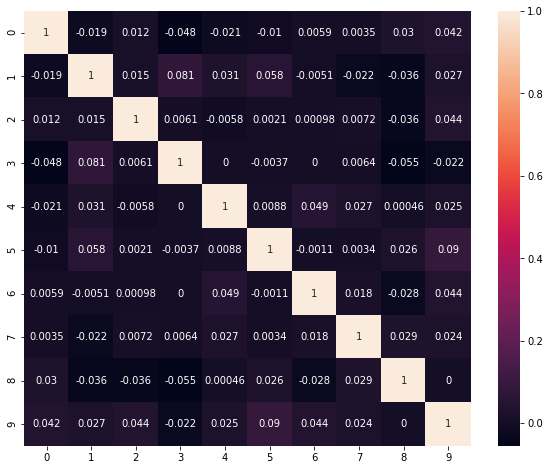

In [62]:
# relation between top 10 items
plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame(item_correlation).iloc[:10,:10], annot = True)
plt.show()

#### The correlation between 10 items shows:
- item 9 is correlated to user 1 to user 8

Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [63]:
item_correlation[item_correlation<0]=0
item_correlation

array([[ 1.        ,  0.        ,  0.01172759, ...,  0.01437829,
         0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.01468032, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01172759,  0.01468032,  1.        , ...,  0.00336027,
         0.        ,  0.        ],
       ..., 
       [ 0.01437829,  0.        ,  0.00336027, ...,  1.        ,
         0.00823288,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.00823288,
         1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

### Prediction

In [64]:
item_predicted_ratings = np.dot((beer_features.fillna(0).T),item_correlation)
item_predicted_ratings

array([[  3.38567952e-01,   6.98817753e-01,   4.59123578e-01, ...,
          3.12086452e-01,   2.42117989e+00,   5.37265447e-01],
       [  0.00000000e+00,   0.00000000e+00,   7.57651655e-02, ...,
          1.20724326e-01,   0.00000000e+00,   3.03569257e-02],
       [  0.00000000e+00,   0.00000000e+00,   5.73021673e-02, ...,
          0.00000000e+00,   0.00000000e+00,   8.99681171e-02],
       ..., 
       [  2.19152664e-01,   2.23178929e-02,   7.61556730e-02, ...,
          5.14729159e-02,   2.11738155e-02,   0.00000000e+00],
       [  3.94171349e-02,   3.24744060e-03,   3.38270674e-02, ...,
          1.84994414e-02,   0.00000000e+00,   8.76618050e-02],
       [  0.00000000e+00,   0.00000000e+00,   7.88640095e-04, ...,
          0.00000000e+00,   5.80464764e-02,   1.71419351e-01]])

In [65]:
item_predicted_ratings.shape

(17729, 3057)

In [66]:
dummy_train.shape

(17729, 3057)

Filtering the rating only for the movies not rated by the user for recommendation

In [67]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

beer_beerid,5,6,7,9,10,14,15,17,19,23,...,74323,74390,74530,74548,74579,74827,74904,74986,75013,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.338568,0.698818,0.459124,0.109667,0.367552,0.175331,1.209843,0.691215,0.293389,0.531643,...,0.117252,0.263181,1.149481,0.454821,0.385205,1.794794,0.614778,0.312086,2.421180,0.537265
01Ryan10,0.000000,0.000000,0.075765,0.000000,0.000000,0.000000,0.000000,0.090202,0.000000,0.000000,...,0.000000,0.071480,0.091317,0.000000,0.082587,0.000000,0.062849,0.120724,0.000000,0.030357
04101Brewer,0.000000,0.000000,0.057302,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.031733,0.000000,0.000000,0.065418,0.000000,0.000000,0.000000,0.000000,0.089968
05Harley,0.947156,0.543709,0.433473,0.117982,0.746104,0.633298,0.568725,0.193222,0.302507,0.720527,...,0.244007,0.087776,0.617453,0.482888,0.353483,0.178673,0.177107,0.294933,0.404263,0.444472
0beerguy0,0.016033,0.203955,0.000000,0.000000,0.175470,0.159572,0.118194,0.120046,0.024913,0.148054,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.085848,0.000000,0.016904,0.000000,0.035055


### Top 5 prediction for the user -1

In [68]:
item_final_rating.iloc[1].sort_values(ascending=False)[0:5]

beer_beerid
53266    1.280122
50241    0.815367
65068    0.793119
7200     0.668118
45897    0.651751
Name: 01Ryan10, dtype: float64

### Evaluation

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the beer already rated by the user insead of predicting it for the beer not rated by the user. 

### Using User Similarity

In [69]:
test_beer_features = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)
mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

# User Similarity Matrix
test_user_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_user_correlation[np.isnan(test_user_correlation)] = 0
print(test_user_correlation)

[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]]


In [70]:
test_user_correlation[test_user_correlation<0]=0
test_user_predicted_ratings = np.dot(test_user_correlation, test_beer_features.fillna(0))
test_user_predicted_ratings

array([[ 0.18811075,  0.92558411,  0.19510264, ...,  0.45564859,
         0.41207326,  0.        ],
       [ 0.26403894,  2.52524902,  1.07239407, ...,  2.47886292,
         0.88627767,  0.78246579],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.57059954,  1.3577185 ,  0.89474562, ...,  0.40151144,
         0.45360292,  0.26767429],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

### Doing prediction for the beers rated by the user

In [71]:
test_user_final_rating = np.multiply(test_user_predicted_ratings,dummy_test)

In [72]:
test_user_final_rating.head()

beer_beerid,5,6,7,9,10,14,15,17,19,23,...,74323,74390,74530,74548,74579,74827,74904,74986,75013,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0runkp0s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Evaluation

### Calculating the RMSE for only the beers rated by user. For RMSE, normalising the rating to (1,5) range.

In [73]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_user_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
X = X.fillna(X.mean())
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(copy=True, feature_range=(1, 5))
[[ 2.28984516  2.22842554  2.32853915 ...,  2.34362909  2.56988775
   2.64136196]
 [ 2.28984516  2.22842554  2.32853915 ...,  2.34362909  2.56988775
   2.64136196]
 [ 2.28984516  2.22842554  2.32853915 ...,  2.34362909  2.56988775
   2.64136196]
 ..., 
 [ 2.28984516  2.22842554  2.32853915 ...,  2.34362909  2.56988775
   2.64136196]
 [ 2.28984516  2.22842554  2.32853915 ...,  2.34362909  2.56988775
   2.64136196]
 [ 2.28984516  2.22842554  2.32853915 ...,  2.34362909  2.56988775
   2.64136196]]


In [74]:
test_ = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [75]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [76]:
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

0.09712621630763622


### Using Item similarity

In [77]:
test_beer_features = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).T

mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

test_item_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_item_correlation[np.isnan(test_item_correlation)] = 0
test_item_correlation[test_item_correlation<0]=0

In [78]:
test_item_correlation.shape

(3057, 3057)

In [79]:
test_beer_features.shape

(3057, 12834)

In [80]:
test_item_predicted_ratings = (np.dot(test_item_correlation, test_beer_features.fillna(0))).T
test_item_final_rating = np.multiply(test_item_predicted_ratings,dummy_test)
test_item_final_rating.head()

beer_beerid,5,6,7,9,10,14,15,17,19,23,...,74323,74390,74530,74548,74579,74827,74904,74986,75013,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0runkp0s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
test_ = test.pivot(
   index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [82]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_item_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
X = X.fillna(X.mean())
print(scaler.fit(X))
y = (scaler.transform(X))


test_ = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

MinMaxScaler(copy=True, feature_range=(1, 5))


### Finding RMSE

In [83]:
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

0.10451621741560646


### Lower values of RMSE indicate better fit and User based collaborative filtered recommendation model shows low RMSE value, which is 0.097 
### RMSE value for item based collaborative recommendation model has is 0.104
### Therefore we will go ahead with User based collaborative recommendation model

## The top 5 beers that you would recommend to the users 'cokes', 'genog' and 'giblet' using both the models.

### Using User based filtering model

In [89]:
# 'cokes'
test_user_final_rating.loc['cokes'].sort_values(ascending=False)[0:5]

beer_beerid
1545     16.238766
1118     15.767950
35625    14.343212
6368     13.005603
15813    10.341048
Name: cokes, dtype: float64

In [90]:
# 'genog'
test_user_final_rating.loc['genog'].sort_values(ascending=False)[0:5]

beer_beerid
9478     42.431462
1094     21.696939
33127    18.983776
15813    17.929614
29015    16.164034
Name: genog, dtype: float64

In [91]:
# 'giblet'
test_user_final_rating.loc['giblet'].sort_values(ascending=False)[0:5]

beer_beerid
1320     43.391834
645      42.785708
129      33.873715
17112    33.533413
276      21.665616
Name: giblet, dtype: float64

### Using Item based filtering model

In [93]:
# 'cokes'
test_item_final_rating.loc['cokes'].sort_values(ascending=False)[0:5]

beer_beerid
17770    30.164537
8422     29.049941
4607     27.030487
20717    26.391925
27116    23.950049
Name: cokes, dtype: float64

In [94]:
# 'genog'
test_item_final_rating.loc['genog'].sort_values(ascending=False)[0:5]

beer_beerid
2010     6.444240
9478     6.298468
2729     5.665508
33127    5.402530
8297     5.260613
Name: genog, dtype: float64

In [95]:
# 'giblet'
test_item_final_rating.loc['giblet'].sort_values(ascending=False)[0:5]

beer_beerid
39043    7.054406
3062     5.767185
19425    5.759415
56613    5.528786
30       5.441708
Name: giblet, dtype: float64